# Introduction

Internet marketing has taken over traditional marketing strategies in the recent past. Companies prefer to advertise their products on websites and social media platforms. However, targeting the right audience is still a challenge in online marketing. Spending millions to display the advertisement to the audience that is not likely to buy your products can be costly.

In this article, we will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement. 
##### The data consists of 10 variables:  'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'.

##### The main variable we are interested in is 'Clicked on Ad'. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

We will see if we can use the other 9 variables to accurately predict the value **'Clicked on Ad'** variable. We will also perform some exploratory data analysis to see how **'Daily Time Spent on Site' in combination with 'Ad Topic Line'** affects the user's decision to click on the add.

## Dataset

The dataset that we will work on comes from an online advertising agency. Each row in the dataset represents an ad with the label ‘Clicked on Ad’ representing whether or not the viewer clicked on the ad. The data also includes more details about the ad viewer, for example, the age and gender of the viewer, the amount of time the user spent on the site on that day, etc.

In [27]:
## Importing Libraries

## To develop our prediction model, we need to import the necessary Python libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing the Dataset

In [2]:
data = pd.read_csv("C:/Users/VISHAL/OneDrive/Desktop/I-Neuron Projects/Ad Click Prediction/advertising.csv")

**Let's see the first ten lines of our DataFrame**

In [3]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


**Based on the first lines in the table, we can get a basic insight into the data we are working with. We want to check how much data do we have within each variable.**

In [4]:
data.shape

(1000, 10)

**As we see dataset has 1000 rows and 10 coloumn**

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Describe function to gain insight into the ranges in which variables change**

**An interesting fact from the table is that the smallest area income is $13,996.50 and the highest is $79,484.80. This means that site visitors are people belonging to different social classes. It can also be concluded that we are analyzing a popular website since users spend between 32 and 91 minutes on the website in one session. These are really big numbers!**

**Furthermore, the average age of a visitor is 36 years. We see that the youngest user has 19 and the oldest is 61 years old. We can conclude that the site is targetting adult users. Finally, if we are wondering whether the site is visited more by men or women, we can see that the situation is almost equal (52% in favor of women).**

## Exploratory Data Analysis (EDA)

**Let’s explore the dataset further with the correlation matrix represented in a heatmap. Correlation describes the linear dependency between variables ranging from -1 to +1. Where +1 implies a strong positive correlation, -1 indicates a strong negative correlation. A correlation of 0 suggests these two variables are not linearly dependent.
Notably, the diagonal values in the correlation matrix are always one because it represents the correlation of a variable with itself.**

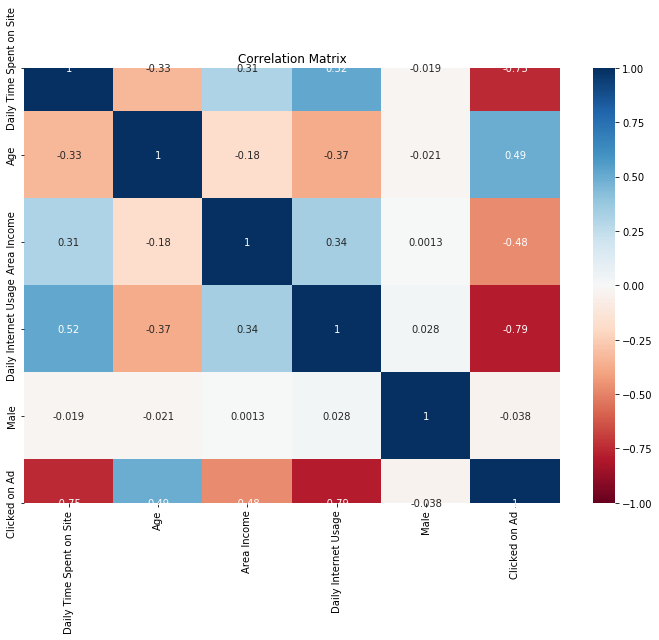

In [9]:
plt.figure(figsize=(12, 8))
s = sns.heatmap(data.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

**In our correlation heatmap, it is visible that the click outcome is inversely correlated with the amount of time an individual spends on the site and the internet in a reverse direction. So let’s take a look at these inter-variable relationship pairs.**

**In the left graphs, we observe that those who spend longer time on the site are less likely to click on the ads. We also see that those who use more internet are also less likely to click on the ads.**

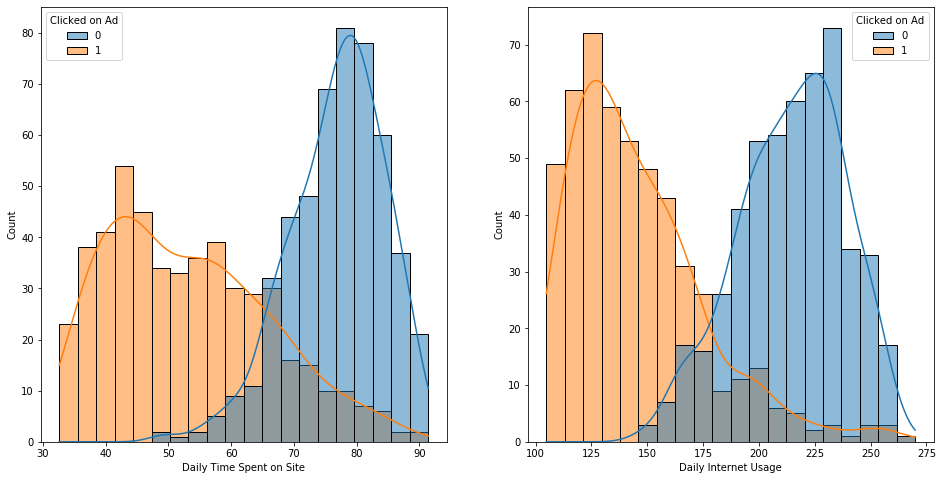

In [28]:
# Let's have a look at the relation between 'daily spent time on site' and 'ad click'
# also the relation between 'daily internet usage' and 'ad click'

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
# plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=data, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

plt.show()

**Let’s see how age influences the ad click event.
Apparently, the younger population is less attracted to the ads.**

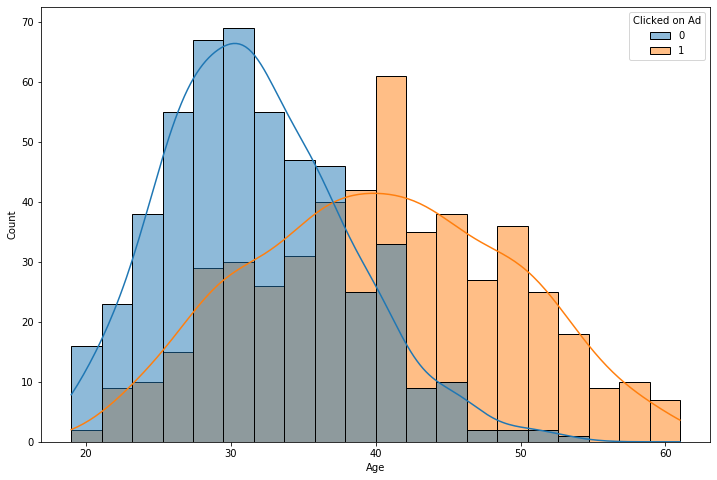

In [29]:
# Let's have a look at the distribution of the age group

# fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Age', bins=20, kde=True, hue='Clicked on Ad')
plt.show()

## Data Preprocessing

**You may have noticed that "Ad Topic Line", "City", and "Country" are categorical columns. Let's plot all the unique values for these columns.**

In [16]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


**As we can see from the table above that all the values in column "Ad Topic Line" is unique, while the "City" column contains 969 unique values out of 1000. There are too many unique elements within these two categorical columns and it is generally difficult to perform a prediction without the existence of a data pattern. Because of that, they will be omitted from further analysis. The third categorical variable, i.e "Country", has a unique element (France) that repeats 9 times. Additionally, we can determine countries with the highest number of visitors**

In [17]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


**We have already seen, there are 237 different unique countries in our dataset and no single country is too dominant. A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded too.**

In [18]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

**Next, we will analyze the 'Timestamp' category. It represents the exact time when a user clicked on the advertisement. We will expand this category to 4 new categories: month, day of the month, day of the week, and hour. In this way, we will get new variables that an ML model will be able to process and find possible dependencies and correlations. Since we have created new variables, we will exclude the original variable "Timestamp" from the table. The "Day of the week" variable contains values from 0 to 6, where each number represents a specific day of the week (from Monday to Sunday).**

In [19]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


## Train and Test Data Sets

**Once the dataset is processed, we need to divide it into two parts: training and test set. We will import and use the train_test_split function for that. All variables except 'Clicked on Ad' will be the input values X for the ML models. The variable 'Clicked on Ad' will be stored in y, and will represent the prediction variable. We arbitrarily chose to allocate 33% of the total data for the training set.**

In [20]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'Day of the month' ,'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Building
***In this project, Three different ML models will be developed: a Logistic Regression model, Decision Tree model and Random Forest.***

***The Logistic Regression model is an algorithm that uses a logistic function to model binary dependent variables. It is a tool for predictive analysis and it is used to explain the relationships between multiple variables.***

***The Decision Tree is one of the most commonly used data mining techniques for analysis and modeling. It is used for classification, prediction, estimation, clustering, data description, and visualization. The advantages of Decision Trees, compared to other data mining techniques are simplicity and computation efficiency.***

***Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.***

***The first model we will import will be a Logistic Regression model. First, it is necessary to load the LogisticRegression function from the sklearn.linear_model library. Also, we will load the accuracy_score to evaluate the classification performances of the model.***

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

***The next steps are the initialization of the model, it's training, and finally, making predictions.***

In [31]:
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]


***The accuracy of the logistic regression model is 0.906 or 90.6%. As can be observed, the performance of the model is also determined by the confusion matrix. The condition for using this matrix is to be exploited on a data set with known true and false values***

***Our confusion matrix tells us that the total number of accurate predictions is 158 + 141 = 299. On the other hand, the number of incorrect predictions is 27 + 4 = 31. We can be satisfied with the prediction accuracy of our model.***

****Now we will import DecisionTreeClassifier from sklearn.tree library. model_2 will be based on the decision tree technique, it will be trained as in the previous case, and desired predictions will be made.***

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9333333333333333

Confusion matrix:
[[152  10]
 [ 12 156]]


***It can be concluded that the Decision Tree model showed better performances in comparison to the Logistic Regression model. The confusion matrix shows us that the 308 predictions have been done correctly and that there are only 22 incorrect predictions. Additionally, Decision Tree accuracy is better by about 3% in comparison to the first regression model.***

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()
model_3.fit(X_train,y_train)
Predictions_RFC=model_3.predict(X_test)

print('Random Forest accuracy:', accuracy_score(Predictions_RFC, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,Predictions_RFC))

Random Forest accuracy: 0.9575757575757575

Confusion matrix:
[[157   5]
 [  9 159]]


***It can be concluded that the Random Forest model showed slightly better performances in comparison to the Descision Tree and Logistic Regression model. The confusion matrix shows us that the 316 predictions have been done correctly and that there are only 14 incorrect predictions. Additionally, Random Forest performs better in comparison to the first two regression model.***

## Conclusion

***The obtained results showed the use value ofmachine learning models. The Random Forest model showed slightly better performance than the Decision Tree and Logistic Regression model, but definitely, models have shown that they can be very successful in solving classification problems.***